# Notebook Proyecto de desarrollo de sistema de IA basado en alquileres de pisos – Segunda fase
# Ismael García Camarena

Voy a estar utilizando el dataset de Kaggle ¨Madrid province rent dataset¨ con datos de propiedades de Idealista, este dataset dispone de estas 32 columnas:

- **web_id:** Idealista id.
- **url:** Idealista link.
- **title:** English title.
- **type:** Property type.
- **price:** Price to rent the property.
- **deposit:** Deposit needed to rent.
- **private_owner:** If the property owner is private.
- **professional_name:** Agency name; if null, indicates private owner.
- **floor_built:** Built area in square meters.
- **floor_area:** Living area in square meters.
- **floor:** Floor number.
- **year_built:** Year of the building.
- **orientation:** Orientation of the property.
- **bedrooms:** Number of bedrooms.
- **bathrooms:** Number of bathrooms.
- **second_hand:** If the property is not new.
- **lift:** If the property has a lift.
- **garage_included:** If the property has a garage.
- **furnished:** If the property is furnished.
- **equipped_kitchen:** If the property has an equipped kitchen.
- **fitted_wardrobes:** If the property has fitted wardrobes.
- **air_conditioning:** If the property has air conditioning.
- **terrace:** If the property has a terrace.
- **balcony:** If the property has a balcony.
- **storeroom:** If the property has a storeroom.
- **swimming_pool:** If the property has a swimming pool.
- **garden_area:** If the property has a garden area.
- **location:** Property address.
- **district:** Property district from Idealista.
- **subdistrict:** Property subdistrict from Idealista.
- **postalcode:** Property postal code.
- **last update:** Last update date from Idealista.


Importamos todas las librerías y hacemos la configuración inicial de seaborn

In [18]:
import numpy as np           
import pandas as pd         
import matplotlib.pyplot as plt 
import seaborn as sns          

# para el estilo de los gráficos
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

Cargamos el dataset

Se importa el dataset desde el csv

In [19]:
data_path = "20221108_1667901786.csv"

# cargo el dataset con un try catch por posibles errores
try:
    df = pd.read_csv(data_path)
    print("Se cargó bien el DS. Dimensiones:", df.shape)
except Exception as e:
    print("Error al cargar el DS:", e)


Se cargó bien el DS. Dimensiones: (9229, 32)


# Información del dataset

In [20]:
# mostramos las primeras filas
df.head()

# mostramos info general
df.info()

# mostramos estadísticas generales de las columnas numéricas
display(df.describe())

# para ver los nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# mostramos cantidad de duplicados
print("Registros duplicados:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   web_id             9229 non-null   int64  
 1   url                9229 non-null   object 
 2   title              9229 non-null   object 
 3   type               9229 non-null   object 
 4   price              9229 non-null   int64  
 5   deposit            5407 non-null   float64
 6   private_owner      9229 non-null   bool   
 7   professional_name  7622 non-null   object 
 8   floor_built        9229 non-null   int64  
 9   floor_area         3938 non-null   float64
 10  floor              8908 non-null   object 
 11  year_built         2893 non-null   float64
 12  orientation        4411 non-null   object 
 13  bedrooms           9229 non-null   int64  
 14  bathrooms          9229 non-null   int64  
 15  second_hand        9229 non-null   bool   
 16  lift               9229 

,web_id,price,deposit,floor_built,floor_area,year_built,bedrooms,bathrooms,postalcode
count,9.229000e+03,9229.000000,5407.000000,9229.000000,3938.000000,2893.000000,9229.000000,9229.000000,6834.000000
mean,9.133077e+07,1937.995883,1.470686,110.285405,94.357288,1975.491531,2.259508,1.787518,28076.947761
std,2.016654e+07,1615.063308,0.622239,87.183901,72.822703,34.928909,1.332689,1.077126,171.686236
min,3.902730e+05,400.000000,1.000000,0.000000,0.000000,1800.000000,0.000000,1.000000,28001.000000
25%,9.578928e+07,1000.000000,1.000000,60.000000,54.000000,1960.000000,1.000000,1.000000,28009.000000
50%,9.891848e+07,1400.000000,1.000000,85.000000,75.000000,1978.000000,2.000000,2.000000,28023.000000
75%,9.929904e+07,2300.000000,2.000000,127.000000,110.000000,2003.000000,3.000000,2.000000,28043.000000
max,9.944594e+07,25000.000000,6.000000,990.000000,995.000000,2022.000000,25.000000,20.000000,28950.000000


Valores nulos por columna:
web_id                  0
url                     0
title                   0
type                    0
price                   0
deposit              3822
private_owner           0
professional_name    1607
floor_built             0
floor_area           5291
floor                 321
year_built           6336
orientation          4818
bedrooms                0
bathrooms               0
second_hand             0
lift                    0
garage_included         0
furnished               0
equipped_kitchen        0
fitted_wardrobes        0
air_conditioning        0
terrace                 0
balcony                 0
storeroom               0
swimming_pool           0
garden_area             0
location                0
district              133
subdistrict           771
postalcode           2395
last_update             0
dtype: int64
Registros duplicados: 0


# Limpiamos el dataset

In [21]:
# elimino símbolos y pasamos a float la columna price
if df['price'].dtype == object:
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# elimino caracteres no num y pasamos a float la columna de floor_area
if df['floor_area'].dtype == object:
    df['floor_area'] = df['floor_area'].replace('[^\d.]', '', regex=True).astype(float)

# pasamos booleanos a string
categorical_cols = ['orientation', 'private_owner', 'lift', 'garage_included', 
                      'furnished', 'terrace', 'balcony', 'swimming_pool', 
                      'district', 'subdistrict']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# eliminamos duplicados y comparamos para ver diferencias
df = df.drop_duplicates()
print("Dimensiones después de eliminar duplicados:", df.shape)


Dimensiones después de eliminar duplicados: (9229, 32)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ismae\AppData\Local\Temp\ipykernel_3384\514424107.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ismae\AppData\Local\Temp\ipykernel_3384\514424107.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['floor_area'] = df['floor_area'].replace('[^\d.]', '', regex=True).astype(float)


# Realizamos comparativas exploratorias con EDAs

vamos a hacer algunos gráficos para entender cómo se comportan los datos:

- histogramas de las variables numéricas para ver su distribución,
- un scatter plot para ver la relación entre 'floor_area' y 'price',
- una matriz de correlación para ver cómo se relacionan las variables numéricas.

además, mostramos estadísticas descriptivas de variables clave como 'bedrooms', 'bathrooms' y 'deposit'.

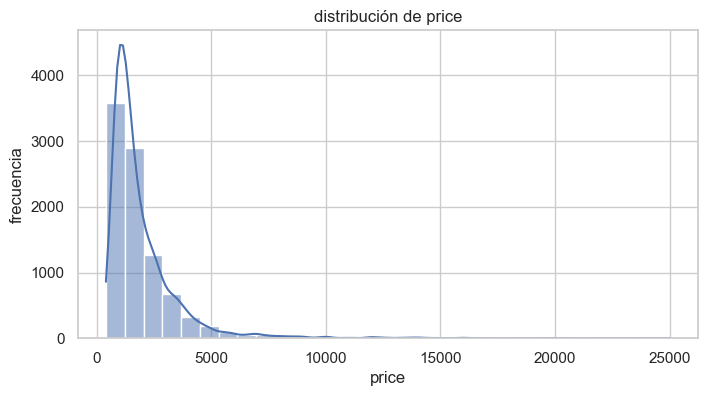

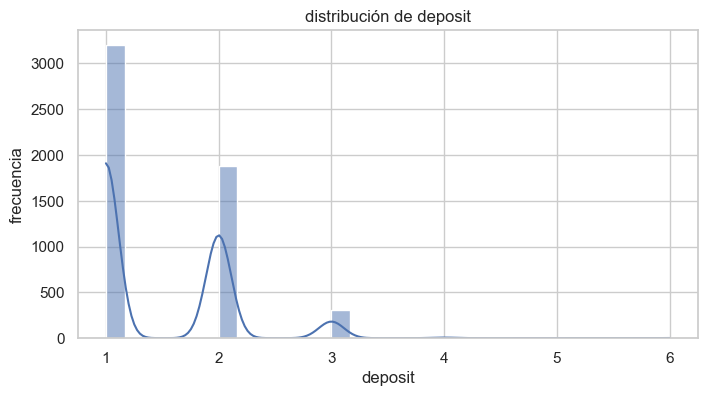

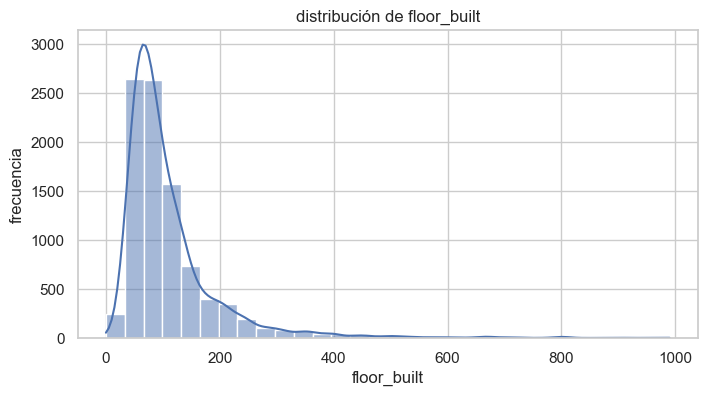

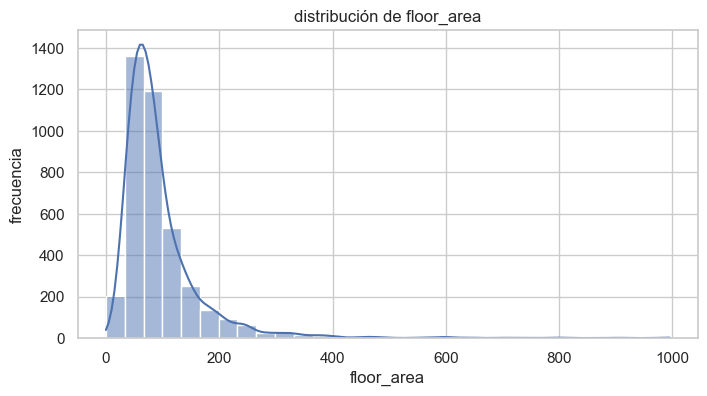

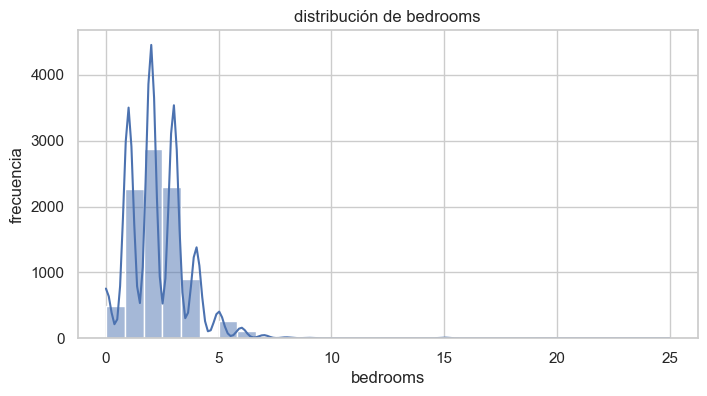

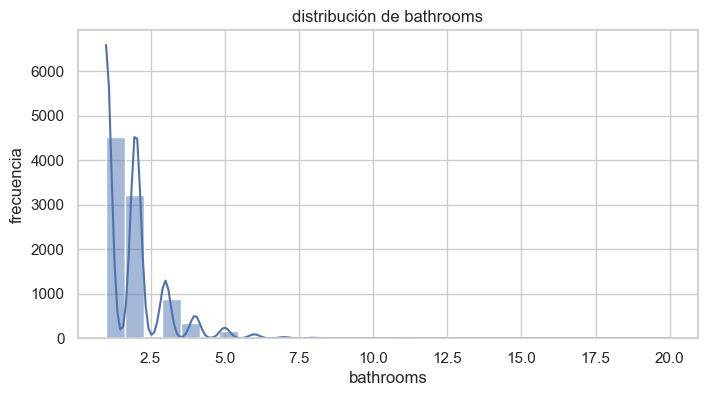

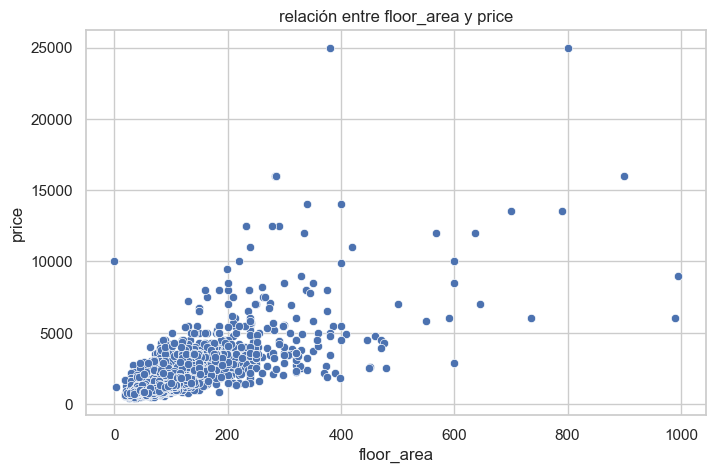

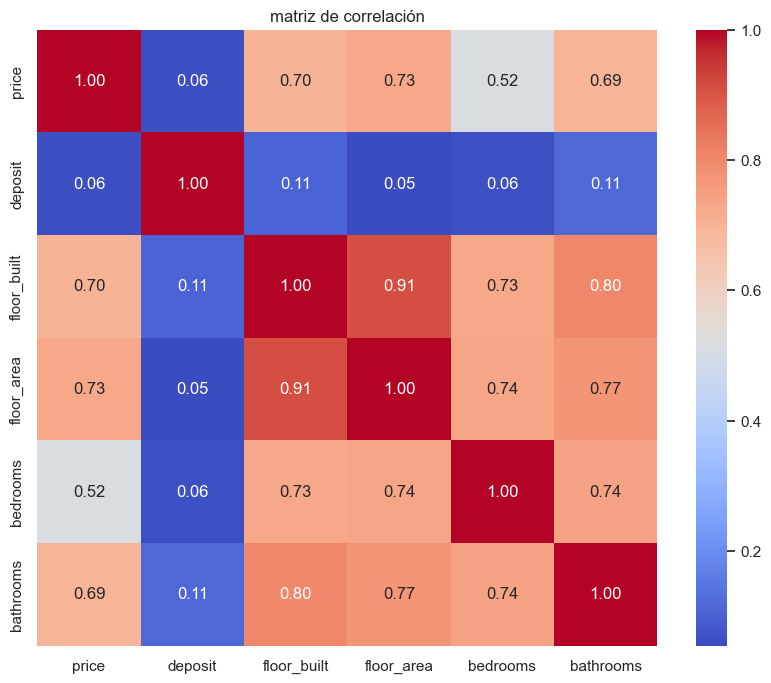

estadísticas descriptivas de bedrooms, bathrooms y deposit:
          bedrooms    bathrooms      deposit
count  9229.000000  9229.000000  5407.000000
mean      2.259508     1.787518     1.470686
std       1.332689     1.077126     0.622239
min       0.000000     1.000000     1.000000
25%       1.000000     1.000000     1.000000
50%       2.000000     2.000000     1.000000
75%       3.000000     2.000000     2.000000
max      25.000000    20.000000     6.000000


In [22]:
# genero histogramas para algunas columnas numéricas importantes
numeric_cols = ['price', 'deposit', 'floor_built', 'floor_area', 'bedrooms', 'bathrooms']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)  # grafico histograma con curva de densidad
    plt.title(f'distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('frecuencia')
    plt.show()

# genero un scatter plot para ver la relación entre 'floor_area' y 'price'
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='floor_area', y='price')
plt.title('relación entre floor_area y price')
plt.xlabel('floor_area')
plt.ylabel('price')
plt.show()

# genero la matriz de correlación para las variables numéricas
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()  # calculo la correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # grafico la matriz con anotaciones
plt.title('matriz de correlación')
plt.show()

# muestro estadísticas descriptivas para 'bedrooms', 'bathrooms' y 'deposit'
print("estadísticas descriptivas de bedrooms, bathrooms y deposit:")
print(df[['bedrooms', 'bathrooms', 'deposit']].describe())


# Preparamos los datos para el modelado

In [23]:
# defino las variables objetivo
target_regression = 'price'         # para predecir el precio
target_classification = 'balcony'     # para saber si tiene balcón

# defino las features, quitando las variables objetivo y columnas que no aportan info
features = [col for col in df.columns if col not in [target_regression, target_classification, 'web_id', 'url', 'title']]

# creo dos dataframes: uno para regresión y otro para clasificación
df_reg = df.dropna(subset=[target_regression]).copy()   # quito filas sin 'price'
df_clf = df.dropna(subset=[target_classification]).copy() # quito filas sin 'balcony'

# defino las columnas numéricas y trato el resto como categóricas
num_features = ['deposit', 'floor_built', 'floor_area', 'bedrooms', 'bathrooms']
cat_features = [col for col in features if col not in num_features]

# creo un pipeline para las numéricas: imputo con la media y luego escalo
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# creo un pipeline para las categóricas: imputo con la moda y luego codifico
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# actualizo el preprocesador con estos pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

X_reg = df_reg[features]             # selecciono las features para regresión
y_reg = df_reg[target_regression]      # selecciono 'price' como variable objetivo

# aplico transformación log para reducir la asimetría en 'price'
y_reg_transformed = np.log1p(y_reg)    # calculo log(1 + price)

# divido en 80% train y 20% test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg_transformed, test_size=0.2, random_state=42)

# ajusto y aplico el preprocesador
X_train_reg_transformed = preprocessor.fit_transform(X_train_reg)
X_test_reg_transformed = preprocessor.transform(X_test_reg)

# -----------------------------
# para la tarea de clasificación
# -----------------------------
X_clf = df_clf[features]                      # uso las mismas features para clasificación
y_clf = df_clf[target_classification].copy()  # selecciono 'balcony' como variable objetivo

# convierto valores de texto a números; primero paso a minúsculas para asegurar el mapeo
if y_clf.dtype == object:
    y_clf = y_clf.str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0}).fillna(0).astype(int)

# muestro la distribución de clases para verificar
print("distribución de clases en 'balcony':")
print(y_clf.value_counts())

# divido en 80% train y 20% test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# ajusto y aplico el preprocesador para clasificación
X_train_clf_transformed = preprocessor.fit_transform(X_train_clf)
X_test_clf_transformed = preprocessor.transform(X_test_clf)


distribución de clases en 'balcony':
balcony
0    7579
1    1650
Name: count, dtype: int64


# Ahora hacemos el modelado

Vamos a probar distintos modelos para ver cuál tiene más accuracy.

para predecir el precio (regresión) usaremos:
- regresión lineal
- árbol de decisión
- random forest
- y una red neuronal sencilla con tensorflow keras

para saber si la propiedad tiene balcón (clasificación) usaremos:
- regresión logística
- árbol de decisión
- random forest
- y una red neuronal simple

vamos a medir el rendimiento con mse para regresión y accuracy para clasificación.

También se va a hacer una red neuronal sencilla para la regresión.


In [24]:
# scikit-learn

# modelo 1: regresión lineal
lr_model = LinearRegression()                        # instancio el modelo de regresión lineal
lr_model.fit(X_train_reg_transformed, y_train_reg)   # entreno el modelo con los datos de entrenamiento
y_pred_lr = lr_model.predict(X_test_reg_transformed) # hago predicciones sobre el test
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)   # calculo el mse
print("mse regresión lineal:", mse_lr)

# modelo 2: árbol de decisión para regresión
dt_reg = DecisionTreeRegressor(random_state=42)      # instancio el árbol de decisión
dt_reg.fit(X_train_reg_transformed, y_train_reg)     # entreno el modelo
y_pred_dt = dt_reg.predict(X_test_reg_transformed)   # hago predicciones
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)   # calculo el mse
print("mse árbol de decisión:", mse_dt)

# tensorflow

# defino una red neuronal sencilla para regresión
model_reg = Sequential([
    #capa densa de 64 neuronas con activación relu, y como input_shape la forma de X_train, vamos, el número de características
    Dense(64, activation='relu', input_shape=(X_train_reg_transformed.shape[1],)),  
    #dropout del 20% para evitar sobreajuste
    Dropout(0.2),                                                                 
    #segundd capa densa de 32 neuronas con activación relu
    Dense(32, activation='relu'),                                                   
    #capa de salida para predecir el precio
    Dense(1)                                                                       
])

# compilo el modelo usando adam y mse como función de pérdida
model_reg.compile(optimizer='adam', loss='mse')

# entreno la red neuronal con el 20% de validación, en 50 epochs y batch de 32
history_reg = model_reg.fit(X_train_reg_transformed, y_train_reg,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=32,
                            verbose=1)

# evalúo el modelo en el conjunto de prueba
mse_nn = model_reg.evaluate(X_test_reg_transformed, y_test_reg, verbose=0)
print("mse red neuronal:", mse_nn)


mse regresión lineal: 0.0780048978276212
mse árbol de decisión: 0.07477136676485721
Epoch 1/50


C:\Users\ismae\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 22.9501 - val_loss: 0.1365
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6412 - val_loss: 0.0836
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5444 - val_loss: 0.0987
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5104 - val_loss: 0.0837
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4657 - val_loss: 0.1481
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4392 - val_loss: 0.0947
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4164 - val_loss: 0.1356
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3927 - val_loss: 0.1152
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3639 - val_loss: 0.2599
Epoch 10/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3165 - val_loss: 0.0742
Epoch 11/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3123 - val_loss: 0.1220
Epoch 12/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0

# Ahora hacemos el modelado de clasificacion

In [25]:
# modelado de clasificación con scikit-learn

# regresión logística para clasificación binaria
logreg = LogisticRegression(max_iter=1000, random_state=42)   # instancio la regresión logística
logreg.fit(X_train_clf_transformed, y_train_clf)              # entreno el modelo
y_pred_logreg = logreg.predict(X_test_clf_transformed)        # hago predicciones
acc_logreg = accuracy_score(y_test_clf, y_pred_logreg)        # calculo la accuracy
print("accuracy regresión logística:", acc_logreg)

# árbol de decisión para clasificación
dt_clf = DecisionTreeClassifier(random_state=42)             # instancio el árbol de decisión
dt_clf.fit(X_train_clf_transformed, y_train_clf)             # entreno el modelo
y_pred_dt_clf = dt_clf.predict(X_test_clf_transformed)       # hago predicciones
acc_dt = accuracy_score(y_test_clf, y_pred_dt_clf)           # calculo la accuracy
print("accuracy árbol de decisión:", acc_dt)

# random forest para clasificación
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # instancio random forest para clasificación
rf_clf.fit(X_train_clf_transformed, y_train_clf)                    # entreno el modelo
y_pred_rf_clf = rf_clf.predict(X_test_clf_transformed)              # hago predicciones
acc_rf = accuracy_score(y_test_clf, y_pred_rf_clf)                  # calculo la accuracy
print("accuracy random forest:", acc_rf)

# modelado de clasificación con tensorflow 

# defino una red neuronal sencilla para clasificación binaria
model_clf = Sequential([
    # capa oculta con 64 neuronas
    Dense(64, activation='relu', input_shape=(X_train_clf_transformed.shape[1],)), 
    # dropout al 20%
    Dropout(0.2),    
    # otra capa oculta con 32 neuronas                                                               
    Dense(32, activation='relu'),   
    # capa de salida con sigmoide para clasificación                                               
    Dense(1, activation='sigmoid')                                                
])

# compilo el modelo usando adam, binary_crossentropy y mido accuracy
model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entreno la red neuronal con el 20% de validación, 50 epochs y batch de 32
history_clf = model_clf.fit(X_train_clf_transformed, y_train_clf,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=32,
                            verbose=1)

# evalúo el modelo en el conjunto de prueba
loss_nn, acc_nn = model_clf.evaluate(X_test_clf_transformed, y_test_clf, verbose=0)
print("accuracy red neuronal:", acc_nn)


accuracy regresión logística: 0.8358613217768147
accuracy árbol de decisión: 0.7941495124593716
accuracy random forest: 0.8418201516793066
Epoch 1/50


C:\Users\ismae\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8146 - loss: 0.4962 - val_accuracy: 0.8307 - val_loss: 0.4122
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8275 - loss: 0.3838 - val_accuracy: 0.8172 - val_loss: 0.4231
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3132 - val_accuracy: 0.8172 - val_loss: 0.4277
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9112 - loss: 0.2188 - val_accuracy: 0.7928 - val_loss: 0.4844
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9451 - loss: 0.1496 - val_accuracy: 0.7949 - val_loss: 0.5490
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9711 - loss: 0.1000 - val_accuracy: 0.8158 - val_loss: 0.6296
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0706 - val_accuracy: 0.7813 - val_loss: 0.6445
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9825 - loss: 0.0539 - val_accuracy: 0.7285 - val_

# Sacamos comparativas y conclusiones

In [26]:
# imprimo la comparativa de los modelos de regresión (mse)
print("\n--- comparativa regresión (mse) ---")
print("regresión lineal:       {:.4f}".format(mse_lr))
print("árbol de decisión:      {:.4f}".format(mse_dt))
print("red neuronal:           {:.4f}".format(mse_nn))

# imprimo la comparativa de los modelos de clasificación (accuracy)
print("\n--- comparativa clasificación (accuracy) ---")
print("regresión logística:    {:.4f}".format(acc_logreg))
print("árbol de decisión:      {:.4f}".format(acc_dt))
print("red neuronal:           {:.4f}".format(acc_nn))



--- comparativa regresión (mse) ---
regresión lineal:       0.0780
árbol de decisión:      0.0748
red neuronal:           0.4841

--- comparativa clasificación (accuracy) ---
regresión logística:    0.8359
árbol de decisión:      0.7941
red neuronal:           0.7876


# Conclusiones

PREDICCIÓN DE PRICE
- regresión lineal obtuvo un MSE de 0.0780 y árbol de decisión de 0.0748. Ambos modelos tienen un rendimiento similar, pero el árbol de decisión es ligeramente mejor (MSE un poco menor).

- red neuronal presentó un MSE mucho más alto (0.4841), lo que indica que, en este caso, el modelo neural no está capturando adecuadamente la relación entre las variables o puede que requiera un ajuste más fino en sus hiperparámetros.

PREDICCIÓN DE BALCONY
- regresión logística alcanza una accuracy de 83.6%, lo que sugiere que un modelo lineal simple es eficaz para predecir la presencia o ausencia de balcón.

- árbol de decisión y red neuronal tienen una accuracy ligeramente inferior (79.4% y 78.8% respectivamente), osea que, para este problema, los modelos más complejos no ofrecen una mejora significativa y, parecen tener un rendimiento menor.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


**Bueno, pues por lo que se observa, los modelos sencillos (regresión lineal y regresión logística) están funcionando mejor que los modelos más complejos, como la red neuronal. Esto puede indicar que en este dataset las relaciones entre las variables son bastante lineales, o que la cantidad y calidad de los datos hacen que un modelo simple sea suficiente**



